In [1]:
import pandas as pd

# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [2]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [3]:
# 금속 농도 열 추출 (단위가 ng/m3인 열)
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

# 날짜 및 시간 추출
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Date'] = df['Pump-Begin'].dt.date
df['Hour'] = df['Pump-Begin'].dt.hour

In [4]:
# 이상치 제거 (NaN, 음수, 0은 결측 처리)
for col in metal_columns:
    df[col] = df[col].apply(lambda x: x if pd.notna(x) and x > 0 else pd.NA)

In [5]:
# 시간별 평균 금속 농도 계산
df_hourly_avg = df.groupby('Hour')[metal_columns].mean().reset_index()

df_hourly_avg.head(6)

,Hour,Al(ng/m3),Si(ng/m3),S(ng/m3),K(ng/m3),Ca(ng/m3),Ti(ng/m3),V(ng/m3),Cr(ng/m3),Mn(ng/m3),...,Cd(ng/m3),In(ng/m3),Sn(ng/m3),Sb(ng/m3),Te(ng/m3),Cs(ng/m3),Ba(ng/m3),Ce(ng/m3),Pb(ng/m3),Bi(ng/m3)
0,0,487.212381,996.955714,3920.591429,287.041905,131.328095,1.03,2.552857,3.001875,6.143333,...,217.502857,25.936842,13.74,17.837273,17.6975,2.342857,9.17,3.338235,12.252222,3.8625
1,1,490.705,986.8115,3937.143,289.719,128.425,0.847692,2.4495,3.125714,7.091333,...,209.296,29.896842,13.052,22.07,23.36875,5.37,9.772,3.642143,13.486471,4.261333
2,2,497.853,981.3935,3949.403,290.934,126.2935,0.979091,2.386,2.898571,6.15375,...,205.6395,25.416667,10.424,17.317,11.497778,4.13,12.85,3.766429,12.146111,3.400588
3,3,498.0325,996.3365,4139.3425,297.731,131.2375,1.118333,2.74,3.175333,7.442667,...,208.7685,31.477222,11.291667,13.620833,11.861818,2.656,12.73,4.088571,11.928421,3.547333
4,4,509.2115,990.623,4172.571,302.676,128.887,1.1275,3.047368,3.344118,7.199412,...,228.458,38.256316,12.138,19.208889,18.203333,3.505,11.466667,3.33125,11.375556,4.034706
5,5,516.279,964.758,4217.176,309.215,128.7625,0.996364,3.013,3.090667,6.738125,...,211.5295,24.355263,11.8625,12.246667,18.840769,2.438571,9.6,6.068571,12.714118,3.964375


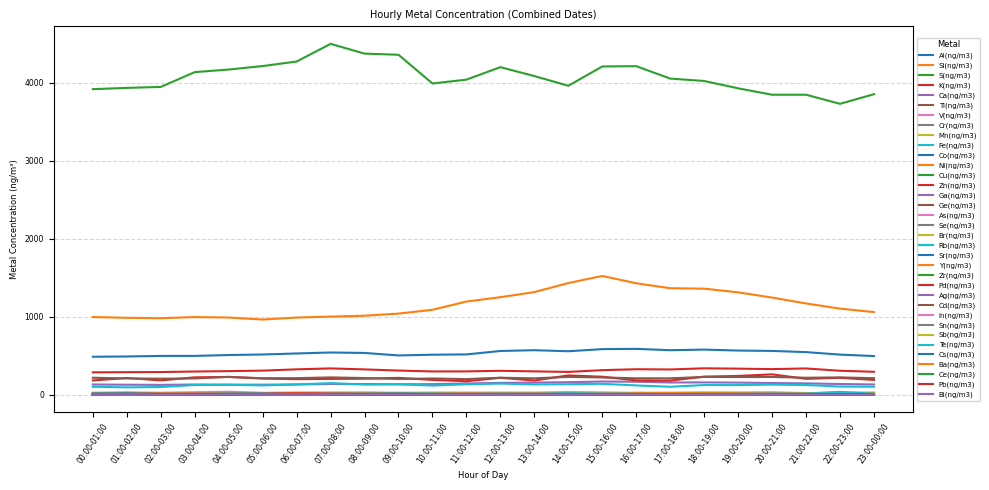

In [6]:
import matplotlib.pyplot as plt

#  선 그래프
plt.figure(figsize=(10, 5))  # 전체 그래프 크기 설정

# 각 금속별 선 그래프 생성
for metal in metal_columns:
    plt.plot(df_hourly_avg['Hour'], df_hourly_avg[metal], label=metal)

# 그래프 기본 설정
plt.title("Hourly Metal Concentration (Combined Dates)", fontsize=7)
plt.xlabel("Hour of Day", fontsize=6)
plt.ylabel("Metal Concentration (ng/m³)", fontsize=6)
plt.xticks(ticks=range(0, 24),
           labels=[f"{h:02d}:00-{(h+1)%24:02d}:00" for h in range(0, 24)],
           rotation=55,
           fontsize=5.5)
plt.yticks(fontsize=5.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 범례 설정
plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           fontsize=5,
           title='Metal',
           title_fontsize=6)

# 레이아웃 자동 조절
plt.tight_layout()

# 결과 출력
plt.show()